In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglog import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv4 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')

In [3]:
bglog = BGLog(save_padded_num_sequences=False, load_from_pkl=True, )
train_test = bglog.get_tensor_train_test(ablation=1000)
train_data, test_data = train_test

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_padded_num_seq_df.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltk.pkl
train_0:, 800
test_0:, 200
train_1:, 800
test_1:, 200
train_2:, 800
test_2:, 200
train_3:, 800
test_3:, 102
4 class does not have 800 records, it has only 628 records
test_4:, 0
5 class does not have 800 records, it has only 165 records
5 class does not have 200 records, it has only 165 records
6 class does not have 800 records, it has only 75 records
6 class does not have 200 records, it has only 75 records
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>


In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=test_data, epochs=7) 

vocab_size: 50
Epoch 1/7
100/100 [==============================] - 11s 100ms/step - loss: 0.4636 - accuracy: 0.8128 - precision: 0.8919 - recall: 0.7347 - val_loss: 0.0431 - val_accuracy: 0.9866 - val_precision: 0.9896 - val_recall: 0.9866
Epoch 2/7
100/100 [==============================] - 10s 99ms/step - loss: 0.0713 - accuracy: 0.9787 - precision: 0.9787 - recall: 0.9772 - val_loss: 0.0142 - val_accuracy: 0.9955 - val_precision: 0.9970 - val_recall: 0.9940
Epoch 3/7
100/100 [==============================] - 10s 98ms/step - loss: 0.0291 - accuracy: 0.9884 - precision: 0.9884 - recall: 0.9881 - val_loss: 0.0034 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/7
100/100 [==============================] - 10s 98ms/step - loss: 0.0234 - accuracy: 0.9922 - precision: 0.9922 - recall: 0.9912 - val_loss: 0.0047 - val_accuracy: 0.9985 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 5/7
100/100 [==============================] - 10s 98ms/step - loss: 0.0085 - 

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.15it/s]


epoch: 1/50, train_loss: 6.584405899047852, eval_score: 0.6405220471543465


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.90it/s]


epoch: 2/50, train_loss: 6.584455966949463, eval_score: 0.7306805641987205


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.08it/s]


epoch: 3/50, train_loss: 6.584506034851074, eval_score: 0.8174601275663949


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.12it/s]


epoch: 4/50, train_loss: 6.584460258483887, eval_score: 0.838007813213702


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 5/50, train_loss: 6.584446430206299, eval_score: 0.852120932042396


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 6/50, train_loss: 6.584433555603027, eval_score: 0.8607577180724426


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 7/50, train_loss: 6.584438323974609, eval_score: 0.8679323324119471


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 8/50, train_loss: 6.584468364715576, eval_score: 0.8747307103075932


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.98it/s]


epoch: 9/50, train_loss: 6.584478855133057, eval_score: 0.8826072078053544


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.22it/s]


epoch: 10/50, train_loss: 6.584439754486084, eval_score: 0.8912850488505579


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 11/50, train_loss: 6.5844197273254395, eval_score: 0.9010594156615102


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 12/50, train_loss: 6.584396839141846, eval_score: 0.9134054270252961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 13/50, train_loss: 6.584466934204102, eval_score: 0.9249111083355804


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.28it/s]


epoch: 14/50, train_loss: 6.584482192993164, eval_score: 0.9350790572046759


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.19it/s]


epoch: 15/50, train_loss: 6.584415912628174, eval_score: 0.9415712965505807


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 16/50, train_loss: 6.584448337554932, eval_score: 0.9467849900994497


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 17/50, train_loss: 6.5844502449035645, eval_score: 0.9505259101105418


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.16it/s]


epoch: 18/50, train_loss: 6.584466457366943, eval_score: 0.9541920602125756


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 19/50, train_loss: 6.584444999694824, eval_score: 0.9550483499065773


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 20/50, train_loss: 6.584444522857666, eval_score: 0.9558223408431309


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 21/50, train_loss: 6.584448337554932, eval_score: 0.9558223408431309


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 22/50, train_loss: 6.584447860717773, eval_score: 0.9559911129417275


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 23/50, train_loss: 6.584433555603027, eval_score: 0.9561918826929536


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 24/50, train_loss: 6.5844831466674805, eval_score: 0.9561918826929536


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 25/50, train_loss: 6.5844879150390625, eval_score: 0.9563923682690187


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 26/50, train_loss: 6.5844621658325195, eval_score: 0.9567176599119239


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 27/50, train_loss: 6.58450174331665, eval_score: 0.9569178619157457


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 28/50, train_loss: 6.584442138671875, eval_score: 0.9569178619157457


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 29/50, train_loss: 6.584484100341797, eval_score: 0.9571177809485374


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 30/50, train_loss: 6.584437847137451, eval_score: 0.9571177809485374


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 31/50, train_loss: 6.58445930480957, eval_score: 0.9575167724973978


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 32/50, train_loss: 6.584418773651123, eval_score: 0.9575167724973978


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 33/50, train_loss: 6.584461688995361, eval_score: 0.9575167724973978


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 34/50, train_loss: 6.584479331970215, eval_score: 0.9575167724973978


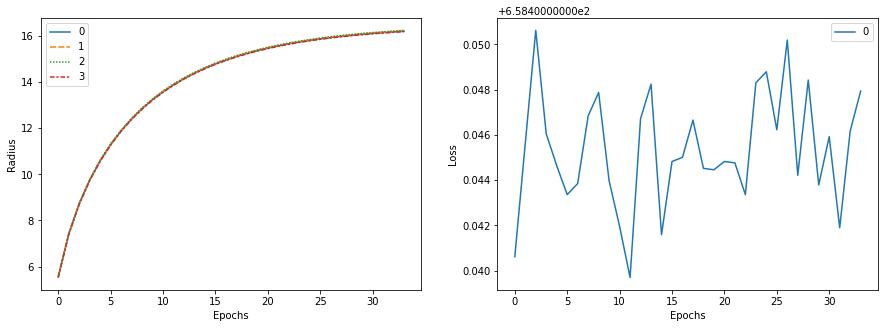

In [5]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=5, wait_patient=3)

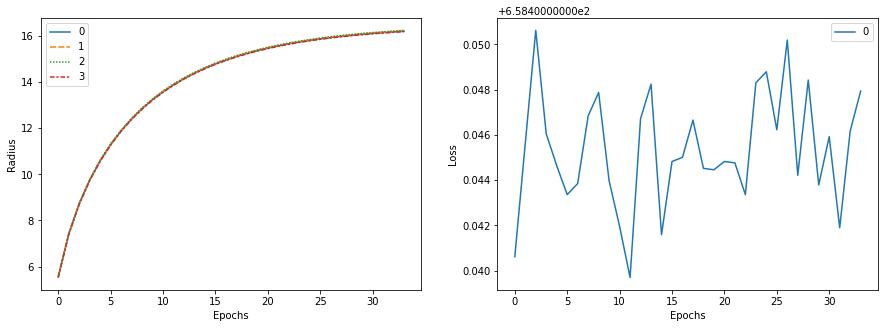

euc_dis: tf.Tensor(
[ 3.1796412   2.9082458   7.75039     0.5965739   8.695879    3.2931476
  3.7721694   1.1576042   3.0228055  10.607431    3.0752134   6.2663355
  5.9302044   4.9431567   4.54113    20.31714    10.623537    9.020341
  0.67623883  4.498102   28.429443    6.4671144   3.1604924  14.301719
 28.429443    6.5579343   4.097557   28.429443   10.929636    2.3664331
  2.8129413   6.300896  ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[16.098312 16.116028 16.13669  16.155363 16.155363 16.116028 16.098312
 16.155363 16.116028 16.098312 16.116028 16.098312 16.098312 16.13669
 16.098312 16.098312 16.155363 16.098312 16.155363 16.098312 16.13669
 16.098312 16.098312 16.13669  16.13669  16.098312 16.116028 16.13669
 16.155363 16.116028 16.116028 16.13669 ], shape=(32,), dtype=float32)
predictions with unknown-9999: [   3    0    1    2    2    0    3    2    0    3    0    3    3    1
    3 9999    2    3    2    3 9999    3    3    1 9999    3    0 9999
    2    0    0   

In [6]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)